# Performance plots for Gaia FGK benchmark stars

## Author(s): Sven Buder (SB, WG4)

### History:
180926 SB Created

In [1]:
# Preamble for notebook 

# Compatibility with Python 3
from __future__ import (absolute_import, division, print_function)

try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

# Basic packages
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import os
import sys
import glob
import pickle
import pandas

# Packages to work with FITS and (IDL) SME.out files
import astropy.io.fits as pyfits
import astropy.table as table
from scipy.io.idl import readsav

# Matplotlib and associated packages for plotting
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.transforms import Bbox,TransformedBbox
from matplotlib.image import BboxImage
from matplotlib.legend_handler import HandlerBase
from matplotlib._png import read_png
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors

params = {
    'font.family'        : 'sans',
    'font.size'          : 17,
    'axes.labelsize'     : 20,
    'ytick.labelsize'    : 16,
    'xtick.labelsize'    : 16,
    'legend.fontsize'    : 20,
    'text.usetex'        : True, 
    'text.latex.preamble': [r'\usepackage{upgreek}', r'\usepackage{amsmath}'],
    }   
plt.rcParams.update(params)

_parula_data = [[0.2081, 0.1663, 0.5292], 
                [0.2116238095, 0.1897809524, 0.5776761905], 
                [0.212252381, 0.2137714286, 0.6269714286], 
                [0.2081, 0.2386, 0.6770857143], 
                [0.1959047619, 0.2644571429, 0.7279], 
                [0.1707285714, 0.2919380952, 0.779247619], 
                [0.1252714286, 0.3242428571, 0.8302714286], 
                [0.0591333333, 0.3598333333, 0.8683333333], 
                [0.0116952381, 0.3875095238, 0.8819571429], 
                [0.0059571429, 0.4086142857, 0.8828428571], 
                [0.0165142857, 0.4266, 0.8786333333], 
                [0.032852381, 0.4430428571, 0.8719571429], 
                [0.0498142857, 0.4585714286, 0.8640571429], 
                [0.0629333333, 0.4736904762, 0.8554380952], 
                [0.0722666667, 0.4886666667, 0.8467], 
                [0.0779428571, 0.5039857143, 0.8383714286], 
                [0.079347619, 0.5200238095, 0.8311809524], 
                [0.0749428571, 0.5375428571, 0.8262714286], 
                [0.0640571429, 0.5569857143, 0.8239571429], 
                [0.0487714286, 0.5772238095, 0.8228285714], 
                [0.0343428571, 0.5965809524, 0.819852381], 
                [0.0265, 0.6137, 0.8135], 
                [0.0238904762, 0.6286619048, 0.8037619048], 
                [0.0230904762, 0.6417857143, 0.7912666667], 
                [0.0227714286, 0.6534857143, 0.7767571429], 
                [0.0266619048, 0.6641952381, 0.7607190476], 
                [0.0383714286, 0.6742714286, 0.743552381], 
                [0.0589714286, 0.6837571429, 0.7253857143], 
                [0.0843, 0.6928333333, 0.7061666667], 
                [0.1132952381, 0.7015, 0.6858571429], 
                [0.1452714286, 0.7097571429, 0.6646285714], 
                [0.1801333333, 0.7176571429, 0.6424333333], 
                [0.2178285714, 0.7250428571, 0.6192619048], 
                [0.2586428571, 0.7317142857, 0.5954285714], 
                [0.3021714286, 0.7376047619, 0.5711857143], 
                [0.3481666667, 0.7424333333, 0.5472666667], 
                [0.3952571429, 0.7459, 0.5244428571], 
                [0.4420095238, 0.7480809524, 0.5033142857], 
                [0.4871238095, 0.7490619048, 0.4839761905], 
                [0.5300285714, 0.7491142857, 0.4661142857], 
                [0.5708571429, 0.7485190476, 0.4493904762],
                [0.609852381, 0.7473142857, 0.4336857143], 
                [0.6473, 0.7456, 0.4188], 
                [0.6834190476, 0.7434761905, 0.4044333333], 
                [0.7184095238, 0.7411333333, 0.3904761905], 
                [0.7524857143, 0.7384, 0.3768142857], 
                [0.7858428571, 0.7355666667, 0.3632714286], 
                [0.8185047619, 0.7327333333, 0.3497904762], 
                [0.8506571429, 0.7299, 0.3360285714], 
                [0.8824333333, 0.7274333333, 0.3217], 
                [0.9139333333, 0.7257857143, 0.3062761905], 
                [0.9449571429, 0.7261142857, 0.2886428571], 
                [0.9738952381, 0.7313952381, 0.266647619], 
                [0.9937714286, 0.7454571429, 0.240347619], 
                [0.9990428571, 0.7653142857, 0.2164142857], 
                [0.9955333333, 0.7860571429, 0.196652381], 
                [0.988, 0.8066, 0.1793666667], 
                [0.9788571429, 0.8271428571, 0.1633142857], 
                [0.9697, 0.8481380952, 0.147452381], 
                [0.9625857143, 0.8705142857, 0.1309], 
                [0.9588714286, 0.8949, 0.1132428571], 
                [0.9598238095, 0.9218333333, 0.0948380952], 
                [0.9661, 0.9514428571, 0.0755333333], 
                [0.9763, 0.9831, 0.0538]]

parula = ListedColormap(_parula_data, name='parula')
parula_zero = _parula_data[0]
parula_0 = ListedColormap(_parula_data, name='parula_0')
parula_0.set_bad((1,1,1))
parula_r = ListedColormap(_parula_data[::-1], name='parula_r')

willi_blau = [0.0722666667, 0.4886666667, 0.8467]

In [2]:
# Some other useful dictionaries

kwargs_scatter_black = dict(
    alpha=0.05,
    s = 1,
    rasterized = True)
kwargs_scatter = dict(
    cmap = parula, 
    s = 15,
    rasterized = True)
kwargs_hist = dict(
    c = 'C0',
    lw=5
    )
tex_dict = dict(
    teff  =r'$T_\mathrm{eff}$',
    logg  =r'$\log g$',
    fe_h  =r'$\mathrm{[Fe/H]}$',
    bp_rp =r'$\mathrm{BP} - \mathrm{RP}$',
    M_G   =r'$\mathrm{M_G}$'
    )

In [3]:
# 
gbs = pyfits.getdata('data/GALAH_GBS2.1.fits',1)
gbs_raw = pyfits.getdata('data/GBS2.1.fits',1)

In [4]:
galah = pyfits.getdata('data/GALAH_gbs_lbol.fits',1)
galah_free = pyfits.getdata('data/GALAH_gbs.fits',1)

In [5]:
gbs_galah_match = []
galah_gbs_match = []

for each_sobject_id in range(len(galah['sobject_id'])):
    if galah['sobject_id'][each_sobject_id] not in [140709001901194,150204002101256]:
        try:
            side_a = np.where(
                    galah['sobject_id'][each_sobject_id] == gbs['sobject_id']
                )[0][0]
            side_b = each_sobject_id
            gbs_galah_match.append(side_a)
            galah_gbs_match.append(side_b)
        except:
            pass
gbs_galah_match = np.array(gbs_galah_match)
galah_gbs_match = np.array(galah_gbs_match)

In [6]:
comparison = dict()

comparison['GBS'] = gbs['StarID1'][gbs_galah_match]
comparison['sobject_id'] = gbs['sobject_id'][gbs_galah_match]
comparison['teff_gbs'] = np.array([float(gbs['Teff'][gbs_galah_match][x]) for x in range(len(gbs['Teff'][gbs_galah_match]))])
comparison['teff_gbs'][comparison['teff_gbs'] < 0] = np.NaN
comparison['logg_gbs'] = gbs['logg'][gbs_galah_match]
comparison['fe_h_gbs'] = gbs['__Fe_H_'][gbs_galah_match]
comparison['e_teff_gbs'] = np.array([float(gbs['e_Teff'][gbs_galah_match][x]) for x in range(len(gbs['e_Teff'][gbs_galah_match]))])
comparison['e_logg_gbs'] = gbs['e_logg'][gbs_galah_match]
comparison['e_fe_h_gbs'] = gbs['e__Fe_H_'][gbs_galah_match]

comparison['teff'] = galah['TEFF'][galah_gbs_match]
comparison['e_teff'] = galah['E_TEFF'][galah_gbs_match]
comparison['logg'] = galah['LOGG'][galah_gbs_match]
comparison['e_logg'] = np.array([0.1 for x in range(len(gbs['E_LOGG'][gbs_galah_match]))])
comparison['fe_h'] = galah['FEH'][galah_gbs_match]
comparison['e_fe_h'] = galah['E_FEH'][galah_gbs_match]

comparison['teff_free'] = galah_free['TEFF'][galah_gbs_match]
comparison['e_teff_free'] = galah_free['E_TEFF'][galah_gbs_match]
comparison['logg_free'] = galah_free['LOGG'][galah_gbs_match]
comparison['e_logg_free'] = np.array([0.1 for x in range(len(galah_free['E_LOGG'][gbs_galah_match]))])
comparison['fe_h_free'] = galah_free['FEH'][galah_gbs_match]
comparison['e_fe_h_free'] = galah_free['E_FEH'][galah_gbs_match]

teff_bias = np.nanmean(comparison['teff_free'] - comparison['teff_gbs'])
teff_std = np.nanstd(comparison['teff_free'] - comparison['teff_gbs'])
logg_bias = np.nanmean(comparison['logg_free'] - comparison['logg_gbs'])
logg_std = np.nanstd(comparison['logg_free'] - comparison['logg_gbs'])
feh_bias = np.nanmean(comparison['fe_h_free'] - comparison['fe_h_gbs'])
feh_std = np.nanstd(comparison['fe_h_free'] - comparison['fe_h_gbs'])

In [7]:
def weighted_avg_and_std(values, weights):
    """
    Return the weighted average and standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    """
    average = np.average(values, weights=weights)
    variance = np.average((values-average)**2, weights=weights)  # Fast and numerically precise
    return (average, np.sqrt(variance))

In [8]:
free_bias = {}

for each_param in ['teff','logg','fe_h']:
    good = (
        np.isfinite(comparison[each_param+'_free']) & np.isfinite(comparison[each_param+'_gbs'])
        )

    free_bias[each_param] = weighted_avg_and_std(
              comparison[each_param+'_free'][good] - comparison[each_param+'_gbs'][good],
              1./(comparison['e_'+each_param+'_free'][good]**2+comparison['e_'+each_param+'_gbs'][good]**2))
    
lbol_bias = {}

for each_param in ['teff','logg','fe_h']:
    good = (
        np.isfinite(comparison[each_param]) & np.isfinite(comparison[each_param+'_gbs'])
        )

    lbol_bias[each_param] = weighted_avg_and_std(
              comparison[each_param][good] - comparison[each_param+'_gbs'][good],
              1./(comparison['e_'+each_param][good]**2+comparison['e_'+each_param+'_gbs'][good]**2))
    

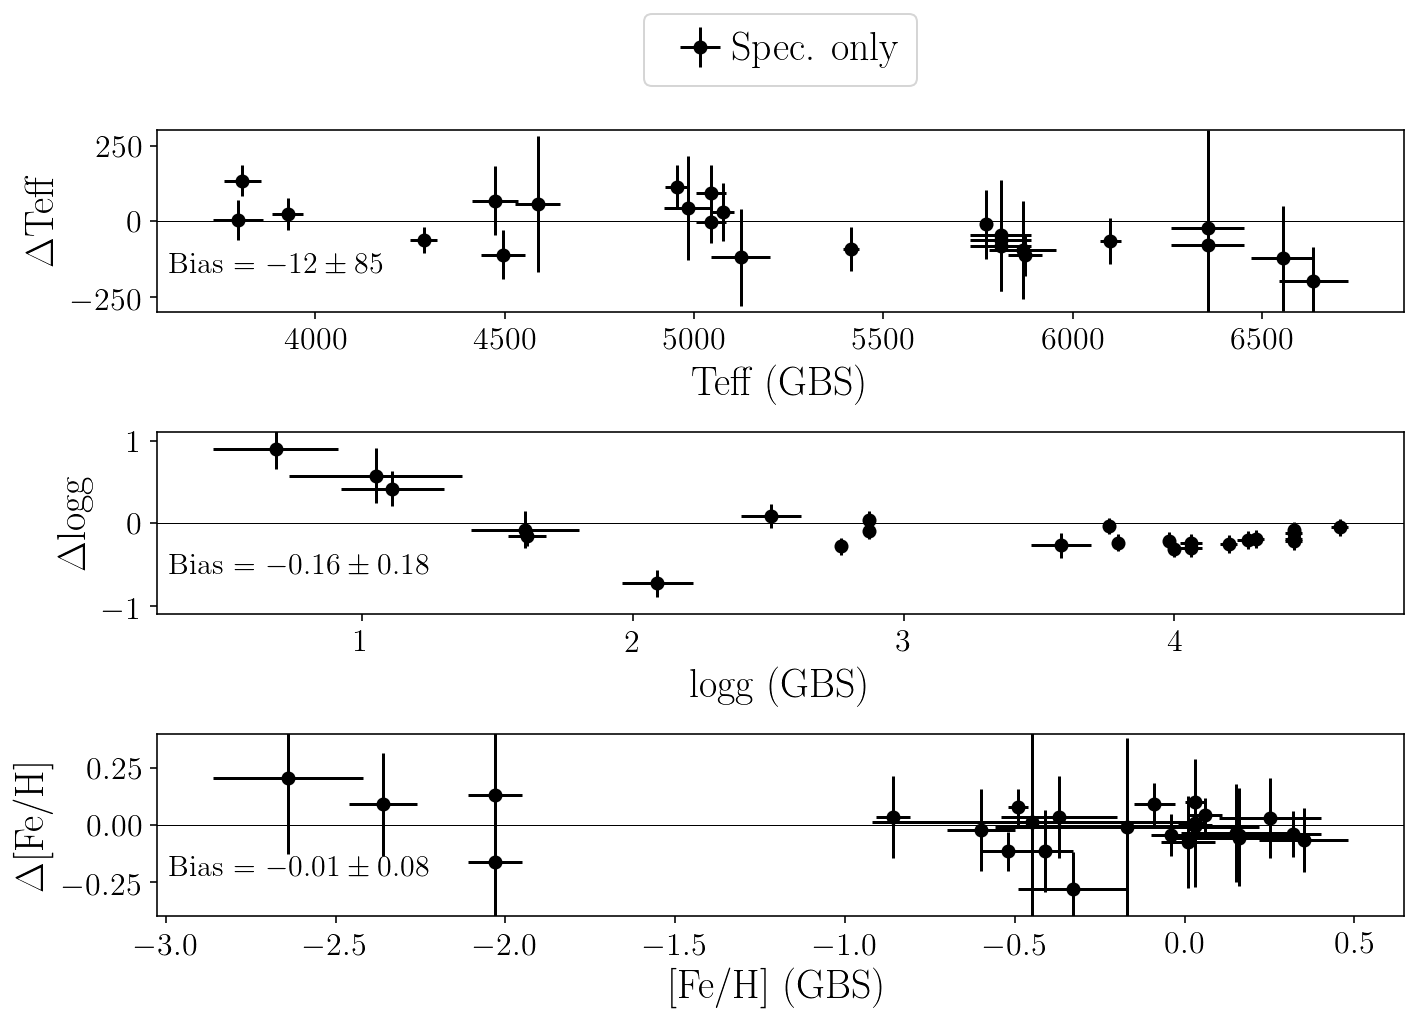

In [9]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (10,7.5))

s1 = ax1.errorbar(
    comparison['teff_gbs'],
    comparison['teff_free'] - comparison['teff_gbs'],
    xerr = comparison['e_teff_gbs'],
    yerr = np.sqrt(comparison['e_teff_gbs']**2 + comparison['e_teff_free']**2),
    fmt = 'o',c='k',
    label='Spec. only'
    )
s2 = ax2.errorbar(
    comparison['logg_gbs'],
    comparison['logg_free'] - comparison['logg_gbs'],
    xerr = comparison['e_logg_gbs'],
    yerr = np.sqrt(comparison['e_logg_gbs']**2 + comparison['e_logg_free']**2),
    fmt = 'o',c='k'
    )

s3 = ax3.errorbar(
    comparison['fe_h_gbs'],
    comparison['fe_h_free'] - comparison['fe_h_gbs'],
    xerr = comparison['e_fe_h_gbs'],
    yerr = np.sqrt(comparison['e_fe_h_gbs']**2 + comparison['e_fe_h_free']**2),
    fmt = 'o',c='k'
    )

ax1.text(0.01,0.225,r'Bias = $'+str('%.0f' % free_bias['teff'][0])+' \pm '+str('%.0f' % free_bias['teff'][1])+'$',transform=ax1.transAxes,color='k',fontsize=15)
ax2.text(0.01,0.225,r'Bias = $'+str('%.2f' % free_bias['logg'][0])+' \pm '+str('%.2f' % free_bias['logg'][1])+'$',transform=ax2.transAxes,color='k',fontsize=15)
ax3.text(0.01,0.225,r'Bias = $'+str('%.2f' % free_bias['fe_h'][0])+' \pm '+str('%.2f' % free_bias['fe_h'][1])+'$',transform=ax3.transAxes,color='k',fontsize=15)

ax1.set_ylim(-300,300)
ax2.set_ylim(-1.1,1.1)
ax3.set_ylim(-0.4,0.4)
ax1.axhline(0,lw=0.5,c='k')
ax2.axhline(0,lw=0.5,c='k')
ax3.axhline(0,lw=0.5,c='k')

ax1.set_xlabel('Teff (GBS)')
ax2.set_xlabel('logg (GBS)')
ax3.set_xlabel('[Fe/H] (GBS)')

ax1.set_ylabel(r'$\Delta$Teff')
ax2.set_ylabel(r'$\Delta$logg')
ax3.set_ylabel(r'$\Delta$[Fe/H]')

ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.75),ncol=4, fancybox=True,handletextpad=-0.2,columnspacing=0.25)

plt.tight_layout()
plt.savefig('figures/gbs_performance_free.png',bbox_inches='tight',dpi=300)

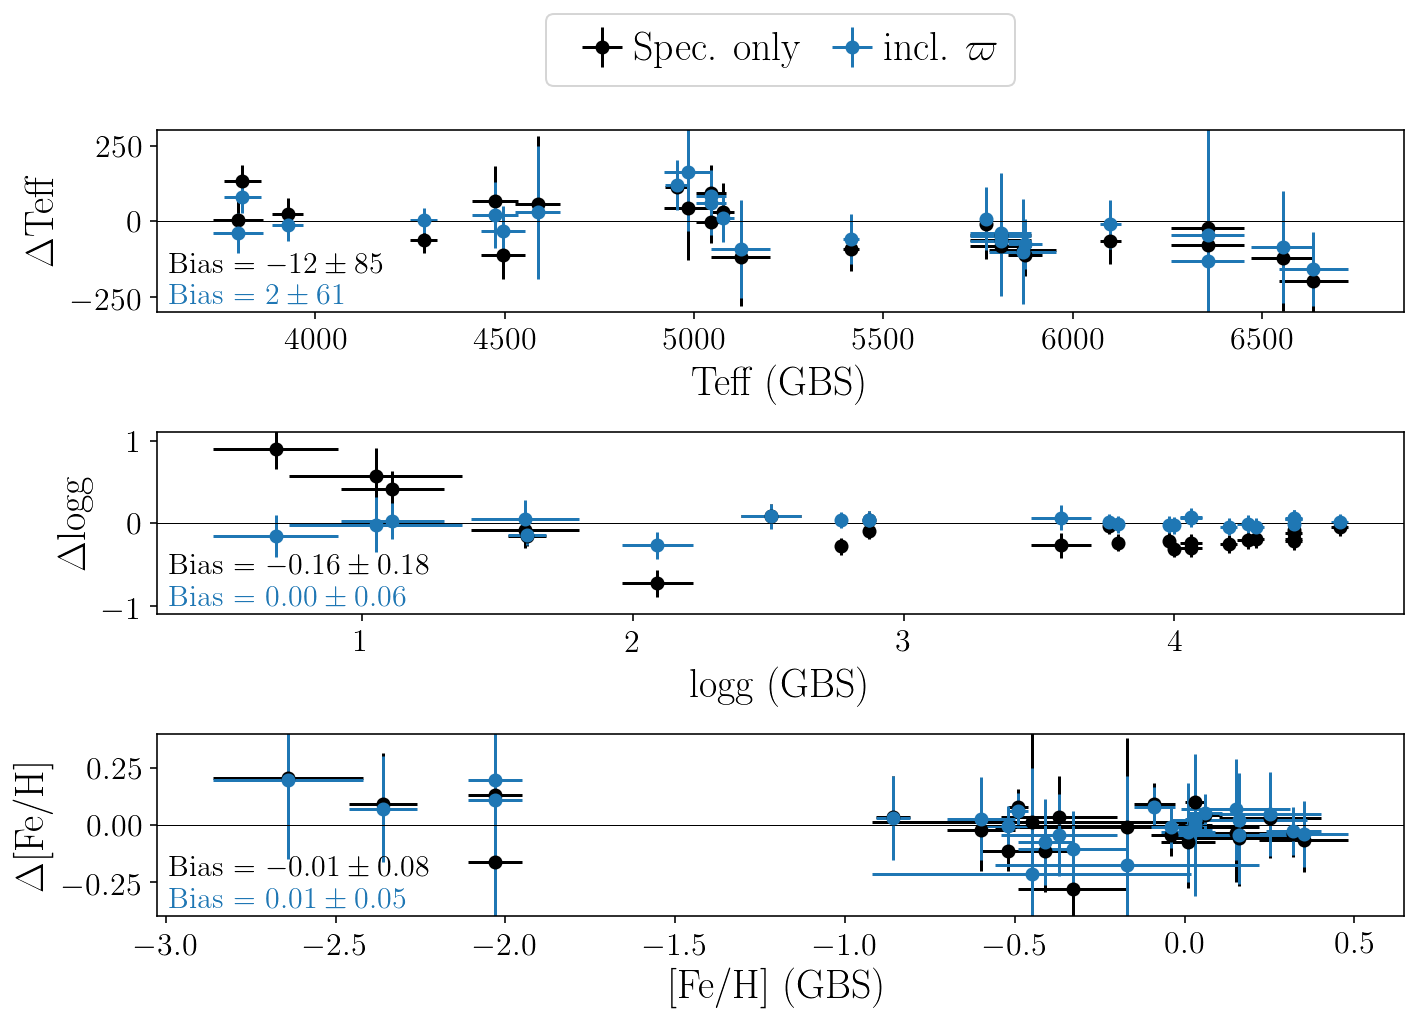

In [10]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (10,7.5))
s1 = ax1.errorbar(
    comparison['teff_gbs'],
    comparison['teff_free'] - comparison['teff_gbs'],
    xerr = comparison['e_teff_gbs'],
    yerr = np.sqrt(comparison['e_teff_gbs']**2 + comparison['e_teff_free']**2),
    fmt = 'o',c='k',
    label='Spec. only'
    )
s1 = ax1.errorbar(
    comparison['teff_gbs'],
    comparison['teff'] - comparison['teff_gbs'],
    xerr = comparison['e_teff_gbs'],
    yerr = np.sqrt(comparison['e_teff_gbs']**2 + comparison['e_teff']**2),
    fmt = 'o',
    label=r'incl. $\varpi$'
    )
s2 = ax2.errorbar(
    comparison['logg_gbs'],
    comparison['logg_free'] - comparison['logg_gbs'],
    xerr = comparison['e_logg_gbs'],
    yerr = np.sqrt(comparison['e_logg_gbs']**2 + comparison['e_logg_free']**2),
    fmt = 'o',c='k'
    )
s2 = ax2.errorbar(
    comparison['logg_gbs'],
    comparison['logg'] - comparison['logg_gbs'],
    xerr = comparison['e_logg_gbs'],
    yerr = np.sqrt(comparison['e_logg_gbs']**2 + comparison['e_logg']**2),
    fmt = 'o'
    )
s3 = ax3.errorbar(
    comparison['fe_h_gbs'],
    comparison['fe_h_free'] - comparison['fe_h_gbs'],
    xerr = comparison['e_fe_h_gbs'],
    yerr = np.sqrt(comparison['e_fe_h_gbs']**2 + comparison['e_fe_h_free']**2),
    fmt = 'o',c='k'
    )
s3 = ax3.errorbar(
    comparison['fe_h_gbs'],
    comparison['fe_h'] - comparison['fe_h_gbs'],
    xerr = comparison['e_fe_h_gbs'],
    yerr = np.sqrt(comparison['e_fe_h_gbs']**2 + comparison['e_fe_h']**2),
    fmt = 'o'
    )

ax1.text(0.01,0.05,r'Bias = $'+str('%.0f' % lbol_bias['teff'][0])+' \pm '+str('%.0f' % lbol_bias['teff'][1])+'$',transform=ax1.transAxes,color='C0',fontsize=15)
ax2.text(0.01,0.05,r'Bias = $'+str('%.2f' % lbol_bias['logg'][0])+' \pm '+str('%.2f' % lbol_bias['logg'][1])+'$',transform=ax2.transAxes,color='C0',fontsize=15)
ax3.text(0.01,0.05,r'Bias = $'+str('%.2f' % lbol_bias['fe_h'][0])+' \pm '+str('%.2f' % lbol_bias['fe_h'][1])+'$',transform=ax3.transAxes,color='C0',fontsize=15)

ax1.text(0.01,0.225,r'Bias = $'+str('%.0f' % free_bias['teff'][0])+' \pm '+str('%.0f' % free_bias['teff'][1])+'$',transform=ax1.transAxes,color='k',fontsize=15)
ax2.text(0.01,0.225,r'Bias = $'+str('%.2f' % free_bias['logg'][0])+' \pm '+str('%.2f' % free_bias['logg'][1])+'$',transform=ax2.transAxes,color='k',fontsize=15)
ax3.text(0.01,0.225,r'Bias = $'+str('%.2f' % free_bias['fe_h'][0])+' \pm '+str('%.2f' % free_bias['fe_h'][1])+'$',transform=ax3.transAxes,color='k',fontsize=15)

ax1.set_ylim(-300,300)
ax2.set_ylim(-1.1,1.1)
ax3.set_ylim(-0.4,0.4)

ax1.axhline(0,lw=0.5,c='k')
ax2.axhline(0,lw=0.5,c='k')
ax3.axhline(0,lw=0.5,c='k')

ax1.set_xlabel('Teff (GBS)')
ax2.set_xlabel('logg (GBS)')
ax3.set_xlabel('[Fe/H] (GBS)')

ax1.set_ylabel(r'$\Delta$Teff')
ax2.set_ylabel(r'$\Delta$logg')
ax3.set_ylabel(r'$\Delta$[Fe/H]')

ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.75),ncol=4, fancybox=True,handletextpad=-0.2,columnspacing=0.25)

plt.tight_layout()
plt.savefig('figures/gbs_performance_free_lbol.png',bbox_inches='tight',dpi=300)

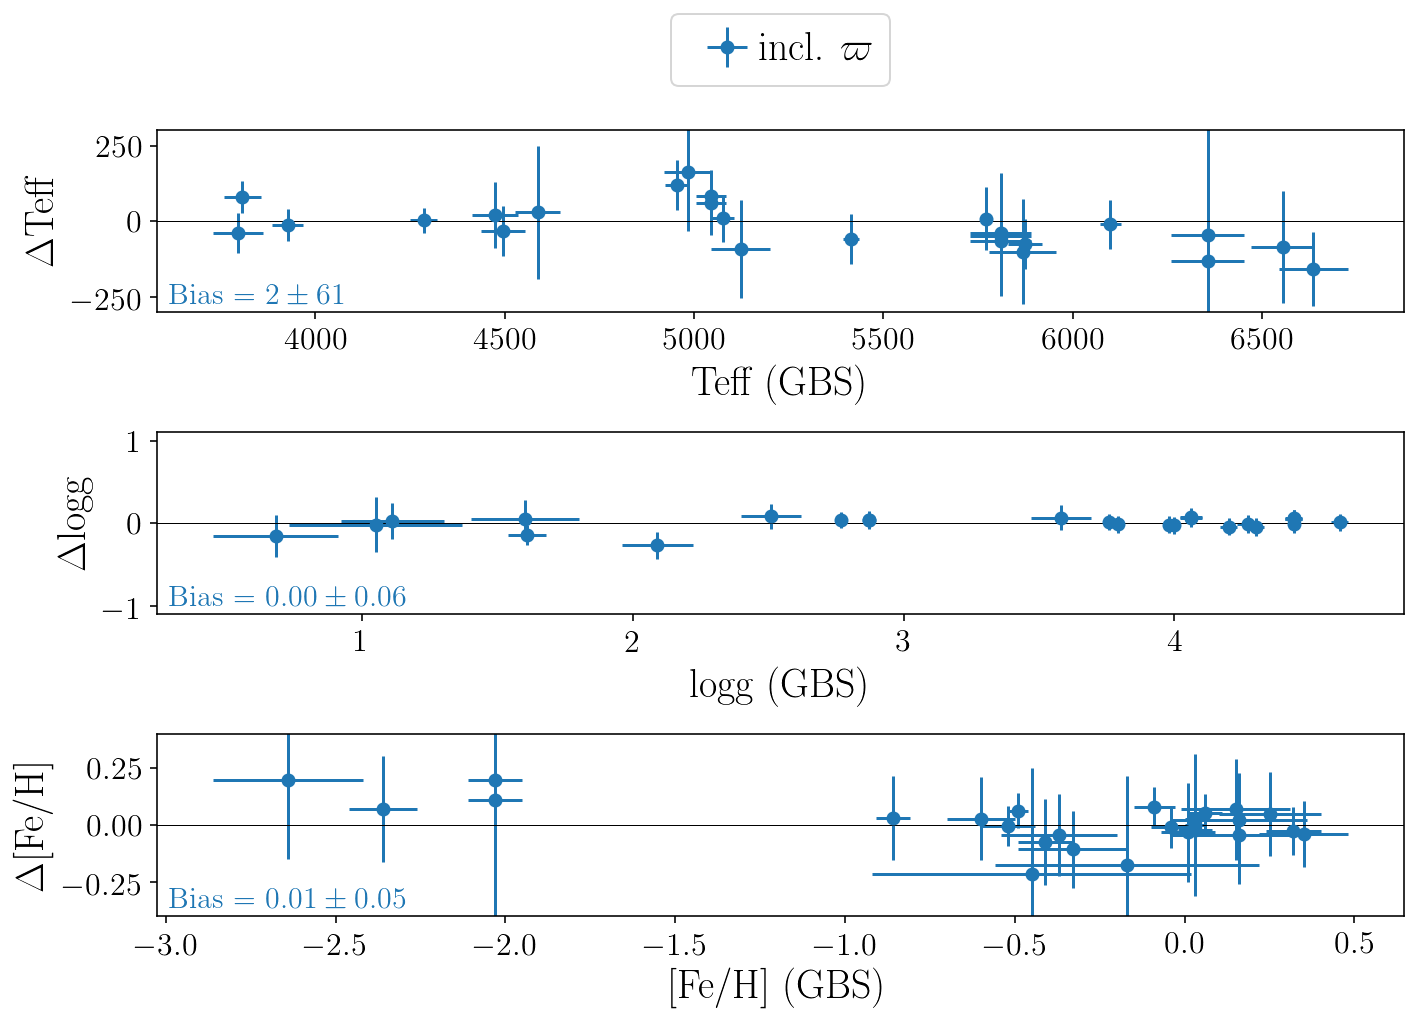

In [11]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (10,7.5))

s1 = ax1.errorbar(
    comparison['teff_gbs'],
    comparison['teff'] - comparison['teff_gbs'],
    xerr = comparison['e_teff_gbs'],
    yerr = np.sqrt(comparison['e_teff_gbs']**2 + comparison['e_teff']**2),
    fmt = 'o',
    label=r'incl. $\varpi$'
    )

s2 = ax2.errorbar(
    comparison['logg_gbs'],
    comparison['logg'] - comparison['logg_gbs'],
    xerr = comparison['e_logg_gbs'],
    yerr = np.sqrt(comparison['e_logg_gbs']**2 + comparison['e_logg']**2),
    fmt = 'o'
    )

s3 = ax3.errorbar(
    comparison['fe_h_gbs'],
    comparison['fe_h'] - comparison['fe_h_gbs'],
    xerr = comparison['e_fe_h_gbs'],
    yerr = np.sqrt(comparison['e_fe_h_gbs']**2 + comparison['e_fe_h']**2),
    fmt = 'o'
    )
ax1.set_ylim(-300,300)
ax2.set_ylim(-1.1,1.1)
ax3.set_ylim(-0.4,0.4)

ax1.axhline(0,lw=0.5,c='k')
ax2.axhline(0,lw=0.5,c='k')
ax3.axhline(0,lw=0.5,c='k')

ax1.set_xlabel('Teff (GBS)')
ax2.set_xlabel('logg (GBS)')
ax3.set_xlabel('[Fe/H] (GBS)')

ax1.set_ylabel(r'$\Delta$Teff')
ax2.set_ylabel(r'$\Delta$logg')
ax3.set_ylabel(r'$\Delta$[Fe/H]')

ax1.text(0.01,0.05,r'Bias = $'+str('%.0f' % lbol_bias['teff'][0])+' \pm '+str('%.0f' % lbol_bias['teff'][1])+'$',transform=ax1.transAxes,color='C0',fontsize=15)
ax2.text(0.01,0.05,r'Bias = $'+str('%.2f' % lbol_bias['logg'][0])+' \pm '+str('%.2f' % lbol_bias['logg'][1])+'$',transform=ax2.transAxes,color='C0',fontsize=15)
ax3.text(0.01,0.05,r'Bias = $'+str('%.2f' % lbol_bias['fe_h'][0])+' \pm '+str('%.2f' % lbol_bias['fe_h'][1])+'$',transform=ax3.transAxes,color='C0',fontsize=15)

ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.75),ncol=4, fancybox=True,handletextpad=-0.2,columnspacing=0.25)

plt.tight_layout()
plt.savefig('figures/gbs_performance_lbol.png',bbox_inches='tight',dpi=300)